## Title of ML project: SALES PREDICTION MODEL

### Name: Yedusree P S

### Organization: Entri Elevate

### Date: [Evaluation Date]

### Overview of Problem Statement

##### An e-commerce company wants to optimize its sales forecasting process to enhance decision-making and resource allocation. The company has a rich dataset of past transactions, including customer details, product information, and sales metrics. The challenge is to leverage this data to build a predictive model that can accurately forecast the sales amount for future transactions.

### Objective

 ##### To develop a predictive model that can accurately forecast the sales amount for future transactions based on historical data. This will help the e-commerce company to optimize its sales forecasting process, enabling better decision-making and efficient resource allocation.

### Data Description:

#### Source: https://www.kaggle.com/datasets/virtualschool/e-commerce-dataset

#### Features:
#### 1.CustomerID: Unique identifier for each customer.
#### 2.Gender: Gender of the customer.
#### 3.InvoiceDate: Date of the transaction.
#### 4.InvoiceNumber: Unique identifier for each transaction.
#### 5.ProductID: Unique identifier for each product.
#### 6.Quantity: Quantity of the product purchased.
#### 7.Price: Price per unit of the product.
#### 8.Total: Total transaction amount.
#### 9.OrderStatus: Status of the order (e.g., Completed, In Process).
#### 10.Country: Country of the customer.
#### 11.TrafficSource: Source of the traffic (e.g., Social Media, Organic Search).
#### 12.SessionDuration: Duration of the customer's session on the website.
#### 13.DeviceCategory: Category of the device used (e.g., Computer, Mobile).
#### 14.Device: Specific device used (e.g., Laptop, Desktop).
#### 15.OS: Operating system of the device.
#### 16.DeliveryRating: Rating of the delivery service.
#### 17.ProductRating: Rating of the product.
#### 18.Sales: Sales amount for the transaction (target variable).

### Import Libraries

In [9]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

### Data Collection

In [10]:
# Loading the dataset 
df=pd.read_csv(r"C:\Users\91963\Desktop\internship\E-Commerce.csv")

In [11]:
# Display the first few rows of the dataset
df.head()

,CustomerID,Gender,InvoiceDate,InvoiceNumber,ProductID,Quantity,Price,Total,OrderStatus,Country,TrafficSource,SessionDuration,DeviceCategory,Device,OS,DeliveryRating,ProductRating,Sales
0,9691,Female,1/01/2019,26088332,32,3,91.37,274.11,Completed,India,Social Media,6.54,Computer,Laptop,Windows,2,5,274.11
1,8327,Female,1/01/2019,95183269,34,1,48.24,48.24,In Process,India,Social Media,5.01,Computer,Desktop,Windows,0,0,0.00
2,6801,Male,1/01/2019,44769684,64,2,35.23,70.46,Completed,United States,Paid Advertisment,0.10,Computer,Desktop,Windows,1,2,70.46
3,4406,Male,1/02/2019,12422351,41,2,32.33,64.66,Completed,Philippines,Social Media,1.95,Mobile,Tablet,Windows,4,4,64.66
4,1966,Male,1/03/2019,84352310,20,1,81.89,81.89,Completed,Brazil,Organic Search,9.15,Computer,Laptop,Windows,5,3,81.89


In [12]:
# Dimension of the DataFrame
df.shape

(3599, 18)

In [13]:
# Get the column names
df.columns

Index(['CustomerID', 'Gender', 'InvoiceDate', 'InvoiceNumber', 'ProductID',
       'Quantity', 'Price', 'Total', 'OrderStatus', 'Country', 'TrafficSource',
       'SessionDuration', 'DeviceCategory', 'Device', 'OS', 'DeliveryRating',
       'ProductRating', 'Sales'],
      dtype='object')

In [14]:
# Get the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599 entries, 0 to 3598
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       3599 non-null   int64  
 1   Gender           3599 non-null   object 
 2   InvoiceDate      3599 non-null   object 
 3   InvoiceNumber    3599 non-null   int64  
 4   ProductID        3599 non-null   int64  
 5   Quantity         3599 non-null   int64  
 6   Price            3599 non-null   float64
 7   Total            3599 non-null   float64
 8   OrderStatus      3599 non-null   object 
 9   Country          3599 non-null   object 
 10  TrafficSource    3599 non-null   object 
 11  SessionDuration  3599 non-null   float64
 12  DeviceCategory   3599 non-null   object 
 13  Device           3599 non-null   object 
 14  OS               3599 non-null   object 
 15  DeliveryRating   3599 non-null   int64  
 16  ProductRating    3599 non-null   int64  
 17  Sales         

In [15]:
# convert data type
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])  

In [16]:
# Generate descriptive statistics
df.describe()

,CustomerID,InvoiceDate,InvoiceNumber,ProductID,Quantity,Price,Total,SessionDuration,DeliveryRating,ProductRating,Sales
count,3599.000000,3599,3.599000e+03,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000
mean,5526.962767,2021-07-02 19:16:19.272019968,5.582117e+07,50.864962,2.000556,48.714571,97.394143,4.992101,2.641011,2.653515,61.185285
min,1111.000000,2019-01-01 00:00:00,1.114055e+07,1.000000,1.000000,1.220000,1.220000,0.010000,0.000000,0.000000,0.000000
25%,3288.000000,2020-03-29 12:00:00,3.355699e+07,26.000000,1.000000,26.030000,37.610000,2.490000,0.000000,0.000000,0.000000
50%,5546.000000,2021-07-03 00:00:00,5.614293e+07,52.000000,2.000000,43.500000,81.460000,4.930000,3.000000,4.000000,31.260000
75%,7777.000000,2022-10-12 00:00:00,7.810160e+07,76.000000,3.000000,74.550000,147.060000,7.515000,5.000000,5.000000,98.040000
max,9998.000000,2023-12-31 00:00:00,9.996354e+07,100.000000,3.000000,99.720000,299.160000,10.000000,5.000000,5.000000,299.160000
std,2586.425565,NaN,2.568169e+07,29.035862,0.813313,29.499165,74.421471,2.896605,2.181087,2.179732,75.880928


In [17]:
df.describe(include=["object"])

,Gender,OrderStatus,Country,TrafficSource,DeviceCategory,Device,OS
count,3599,3599,3599,3599,3599,3599,3599
unique,2,4,30,3,2,4,5
top,Male,Completed,United States,Organic Search,Computer,Desktop,Windows
freq,2409,2245,310,1796,2531,1307,2469


In [18]:
# Distribution of categorical variables
print(df['Gender'].value_counts())
print(df['OrderStatus'].value_counts())
print(df['Country'].value_counts())
print(df['TrafficSource'].value_counts())
print(df['DeviceCategory'].value_counts())
print(df['Device'].value_counts())
print(df['OS'].value_counts())

Gender
Male      2409
Female    1190
Name: count, dtype: int64
OrderStatus
Completed     2245
In Process     665
Cancelled      457
Returned       232
Name: count, dtype: int64
Country
United States     310
Japan             280
United Kingdom    232
China             224
Germany           193
South Korea       187
India             186
Canada            177
Italy             166
France            160
Russia            138
Spain             130
Mexico            125
Australia         116
Brazil            116
Turkey             94
Netherlands        87
Taiwan             86
Indonesia          82
Switzerland        80
Saudi Arabia       54
Poland             52
Argentina          47
Egypt              46
Vietnam            45
Belgium            40
Philippines        40
Nigeria            38
Thailand           37
Iran               31
Name: count, dtype: int64
TrafficSource
Organic Search       1796
Social Media         1192
Paid Advertisment     611
Name: count, dtype: int64
DeviceCateg

### Data Preprocessing - Data Cleaning

In [19]:
#Check for missing values
df.isnull().sum()

CustomerID         0
Gender             0
InvoiceDate        0
InvoiceNumber      0
ProductID          0
Quantity           0
Price              0
Total              0
OrderStatus        0
Country            0
TrafficSource      0
SessionDuration    0
DeviceCategory     0
Device             0
OS                 0
DeliveryRating     0
ProductRating      0
Sales              0
dtype: int64

In [20]:
# Check for duplicates 
duplicates = df[df.duplicated()]
duplicates

,CustomerID,Gender,InvoiceDate,InvoiceNumber,ProductID,Quantity,Price,Total,OrderStatus,Country,TrafficSource,SessionDuration,DeviceCategory,Device,OS,DeliveryRating,ProductRating,Sales


In [21]:
# Rename columns
df.rename(columns={'Total':'TotalAmount','Sales': 'SalesAmount'}, inplace=True)
df.columns

Index(['CustomerID', 'Gender', 'InvoiceDate', 'InvoiceNumber', 'ProductID',
       'Quantity', 'Price', 'TotalAmount', 'OrderStatus', 'Country',
       'TrafficSource', 'SessionDuration', 'DeviceCategory', 'Device', 'OS',
       'DeliveryRating', 'ProductRating', 'SalesAmount'],
      dtype='object')

#### Checking Outliers using IQR

In [22]:
def find_outliers(data, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [23]:
for column in df.select_dtypes(include=[np.number]).columns:
    outliers = find_outliers(df, column)
    print(f"{column} has {len(outliers)} outliers.")

CustomerID has 0 outliers.
InvoiceNumber has 0 outliers.
ProductID has 0 outliers.
Quantity has 0 outliers.
Price has 0 outliers.
TotalAmount has 0 outliers.
SessionDuration has 0 outliers.
DeliveryRating has 0 outliers.
ProductRating has 0 outliers.
SalesAmount has 134 outliers.


#### checking outliers using zscore

In [24]:
mean=df.SalesAmount.mean()
std=df.SalesAmount.std()

In [25]:
df["zscore"]=(df.SalesAmount-mean)/std

In [26]:
df[(df.zscore>-3)&(df.zscore<3)]

,CustomerID,Gender,InvoiceDate,InvoiceNumber,ProductID,Quantity,Price,TotalAmount,OrderStatus,Country,TrafficSource,SessionDuration,DeviceCategory,Device,OS,DeliveryRating,ProductRating,SalesAmount,zscore
0,9691,Female,2019-01-01,26088332,32,3,91.37,274.11,Completed,India,Social Media,6.54,Computer,Laptop,Windows,2,5,274.11,2.806037
1,8327,Female,2019-01-01,95183269,34,1,48.24,48.24,In Process,India,Social Media,5.01,Computer,Desktop,Windows,0,0,0.00,-0.806333
2,6801,Male,2019-01-01,44769684,64,2,35.23,70.46,Completed,United States,Paid Advertisment,0.10,Computer,Desktop,Windows,1,2,70.46,0.122227
3,4406,Male,2019-01-02,12422351,41,2,32.33,64.66,Completed,Philippines,Social Media,1.95,Mobile,Tablet,Windows,4,4,64.66,0.045792
4,1966,Male,2019-01-03,84352310,20,1,81.89,81.89,Completed,Brazil,Organic Search,9.15,Computer,Laptop,Windows,5,3,81.89,0.272858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,1130,Male,2023-12-29,71920492,75,3,32.34,97.02,In Process,Germany,Organic Search,9.42,Computer,Desktop,Mac,0,0,0.00,-0.806333
3595,8329,Male,2023-12-30,60510134,2,1,33.11,33.11,Completed,United States,Social Media,9.78,Computer,Laptop,Windows,4,5,33.11,-0.369991
3596,8023,Male,2023-12-31,52697896,2,1,33.11,33.11,Completed,India,Organic Search,9.80,Computer,Laptop,Windows,3,5,33.11,-0.369991
3597,8307,Male,2023-12-31,61266739,55,2,73.53,147.06,In Process,South Korea,Paid Advertisment,6.53,Computer,Laptop,Windows,0,0,0.00,-0.806333


In [27]:
#outliers
outliers=df[(df.zscore<-3)|(df.zscore>3)]
outliers

,CustomerID,Gender,InvoiceDate,InvoiceNumber,ProductID,Quantity,Price,TotalAmount,OrderStatus,Country,TrafficSource,SessionDuration,DeviceCategory,Device,OS,DeliveryRating,ProductRating,SalesAmount,zscore
33,1847,Female,2019-01-19,85343805,49,3,99.72,299.16,Completed,Indonesia,Social Media,5.43,Computer,Laptop,Windows,5,4,299.16,3.136160
57,2495,Male,2019-01-30,50599444,21,3,98.91,296.73,Completed,China,Organic Search,2.21,Mobile,Tablet,Windows,4,3,296.73,3.104136
231,1847,Female,2019-04-26,66128332,24,3,99.58,298.74,Completed,China,Social Media,0.46,Mobile,Smart Phone,Android,3,4,298.74,3.130625
252,5033,Male,2019-05-07,26919482,3,3,97.19,291.57,Completed,Saudi Arabia,Social Media,3.87,Computer,Desktop,Windows,4,3,291.57,3.036135
328,9154,Male,2019-06-12,32647874,100,3,98.59,295.77,Completed,United States,Organic Search,6.57,Mobile,Smart Phone,Android,4,5,295.77,3.091485
544,5895,Male,2019-10-01,96727796,69,3,96.47,289.41,Completed,Spain,Organic Search,4.94,Computer,Desktop,Windows,3,4,289.41,3.007669
569,3011,Male,2019-10-15,55129277,100,3,98.59,295.77,Completed,Thailand,Paid Advertisment,7.30,Mobile,Smart Phone,Android,4,4,295.77,3.091485
712,3790,Male,2019-12-25,25888666,3,3,97.19,291.57,Completed,Netherlands,Organic Search,0.86,Computer,Desktop,Windows,3,5,291.57,3.036135
756,8709,Male,2020-01-13,38188975,21,3,98.91,296.73,Completed,India,Social Media,8.51,Computer,Desktop,Mac,4,5,296.73,3.104136
784,6459,Female,2020-01-27,63280940,24,3,99.58,298.74,Completed,Nigeria,Paid Advertisment,9.98,Mobile,Smart Phone,Android,4,4,298.74,3.130625


In [28]:
num_outliers = len(outliers)
num_outliers 

39

In [29]:
#skewness
from scipy.stats import skew
skewness = skew(df['SalesAmount'])
skewness

1.2687316931488835

In [30]:
#kurtosis
from scipy.stats import kurtosis
kurtosis(df['SalesAmount'],fisher=False)

3.7720973256004044

In [31]:
df1 = df.drop(columns=['zscore'])

### Exploratory Data Analysis

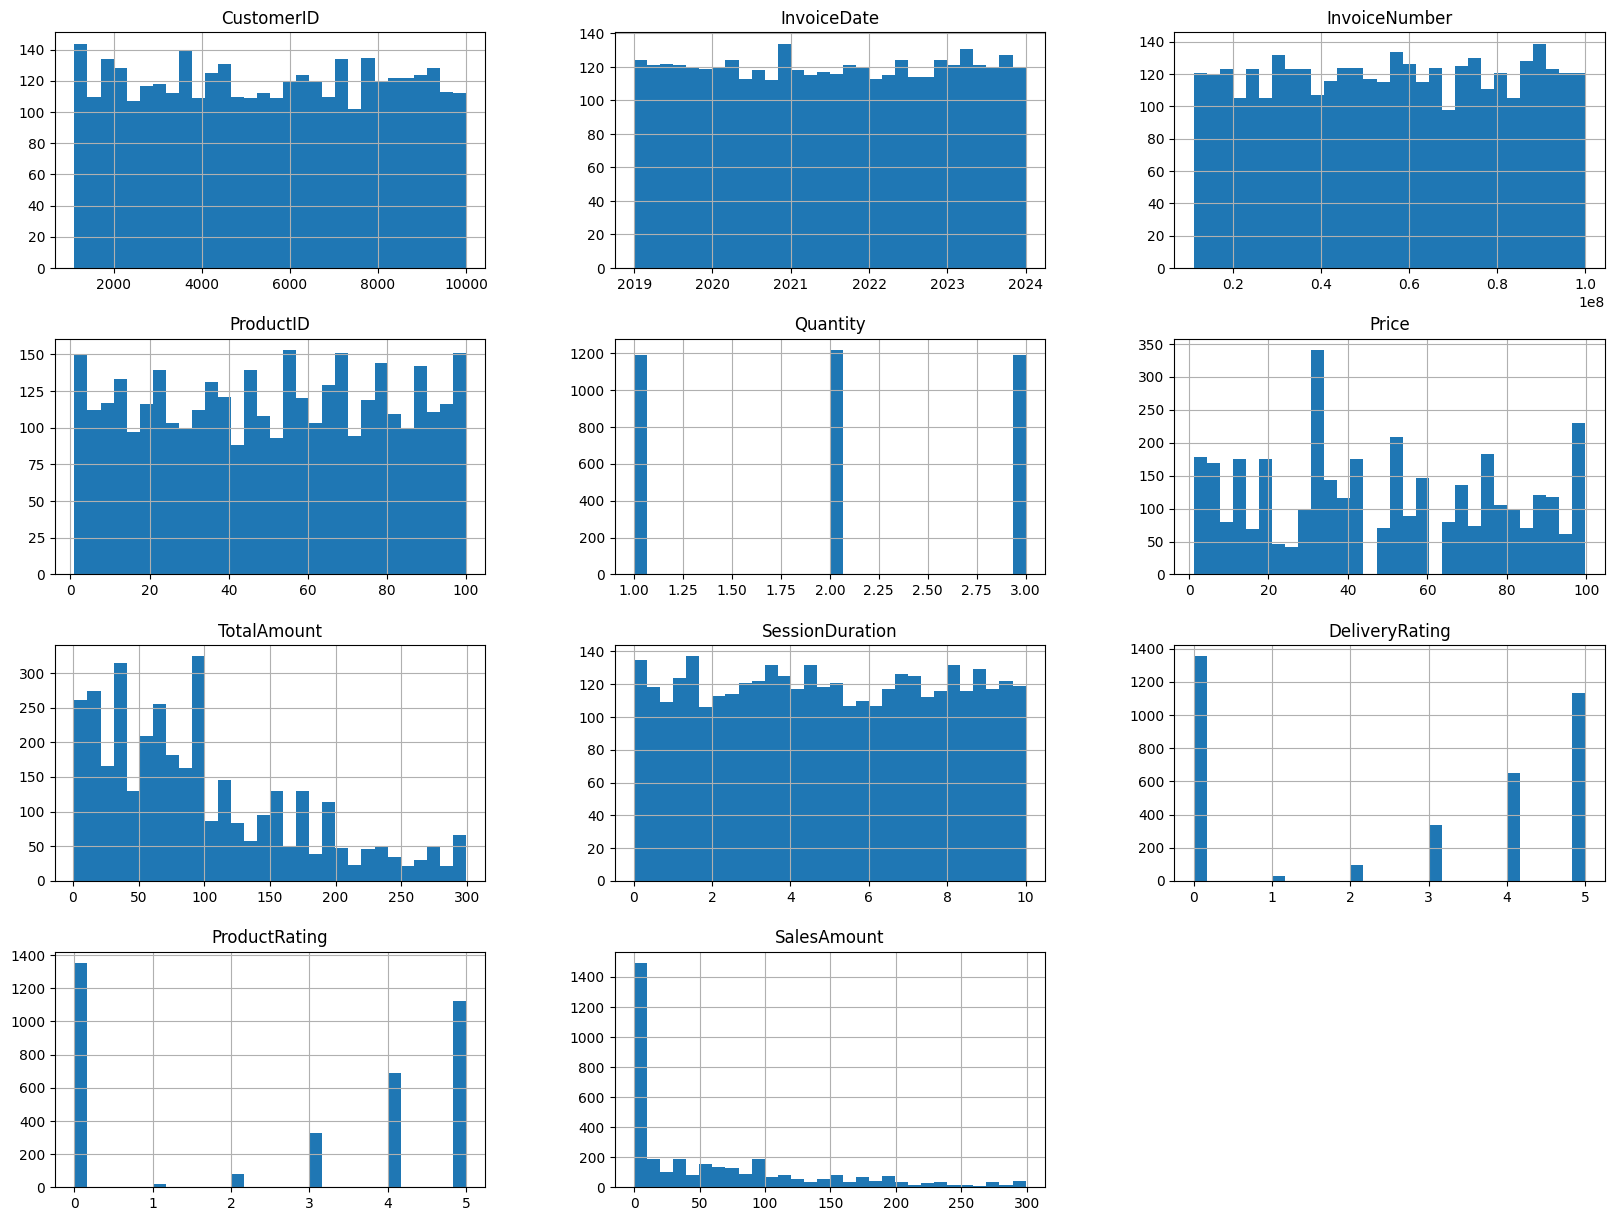

In [32]:
#histograms for numerical columns
df1.hist(bins=30, figsize=(20, 15))
plt.show()

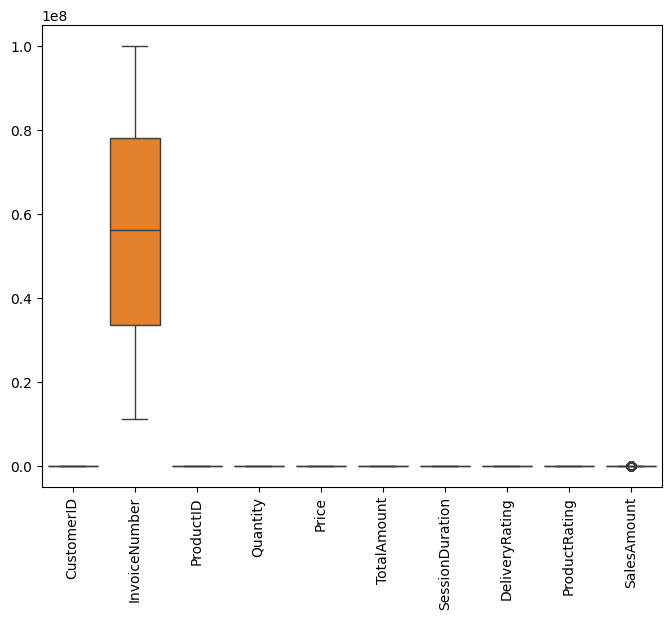

In [33]:
#boxplots for all numerical features
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1)
plt.xticks(rotation=90)
plt.show()

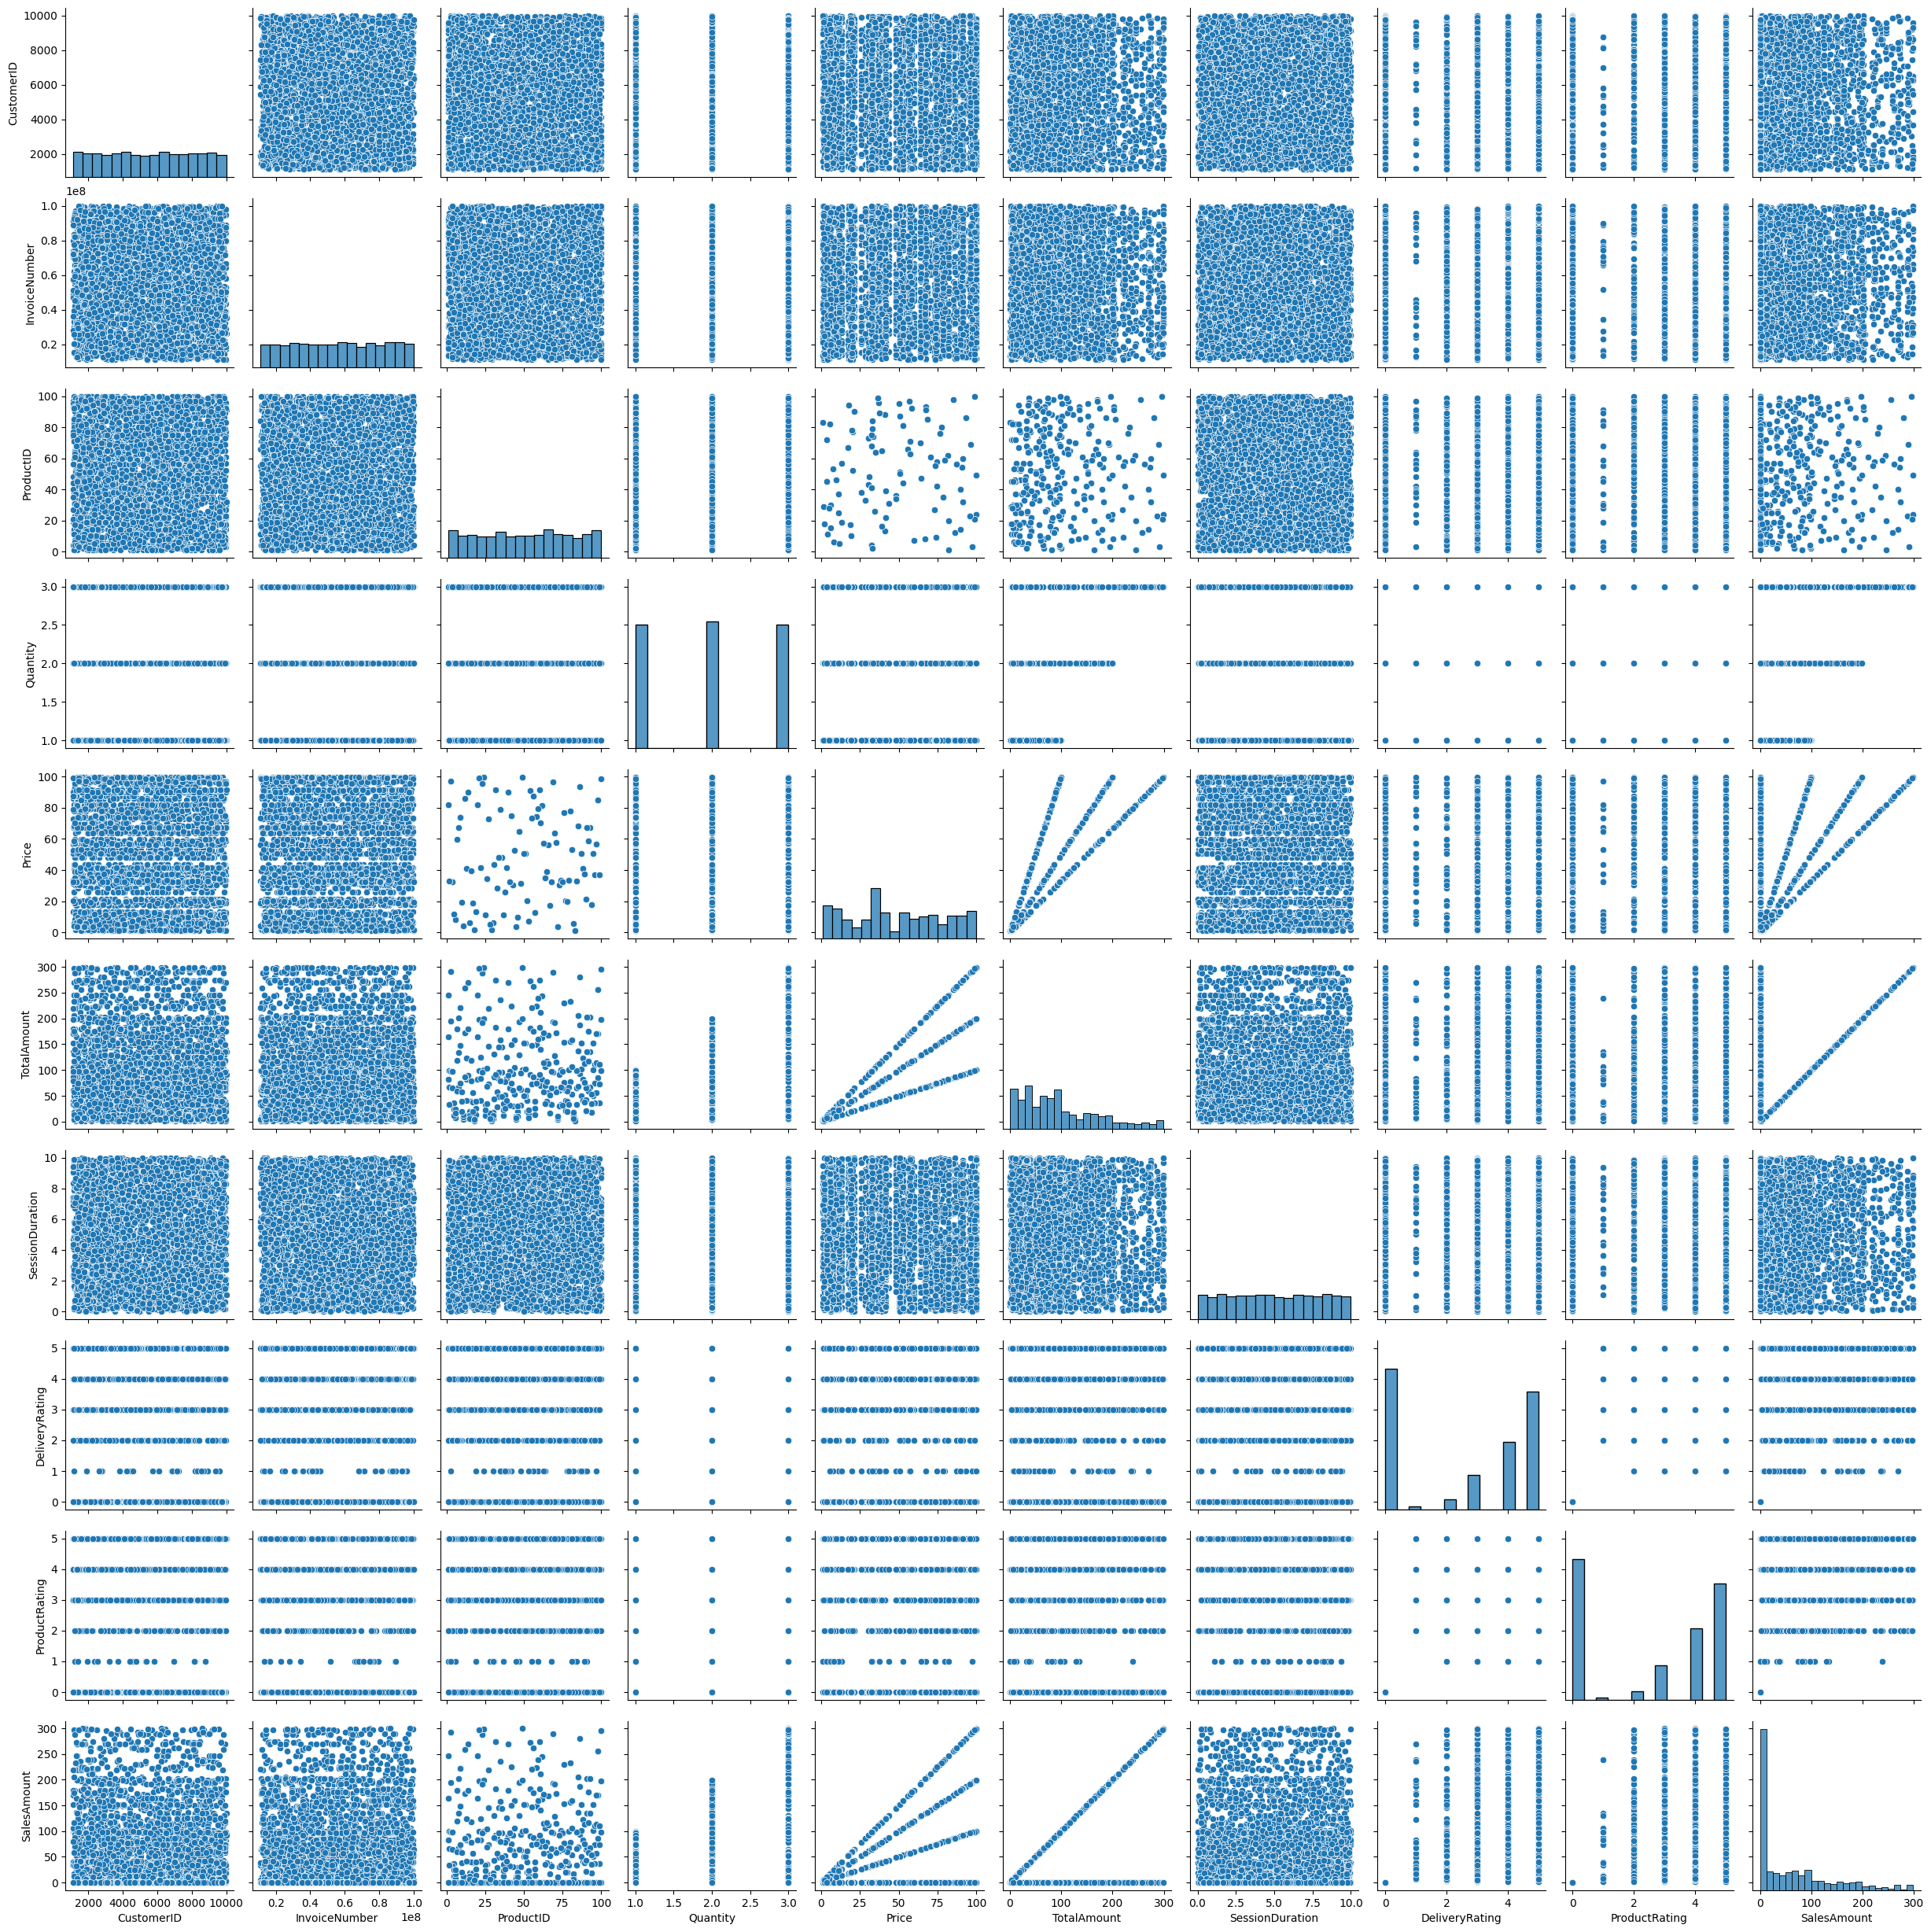

In [34]:
# Pair plot to see relationships between numerical variables
sns.pairplot(df1)
plt.show()

In [35]:
#correlation
numerical_cols = df1.select_dtypes(include=['float64', 'int64'])
corr1=numerical_cols.corr()
corr1

,CustomerID,InvoiceNumber,ProductID,Quantity,Price,TotalAmount,SessionDuration,DeliveryRating,ProductRating,SalesAmount
CustomerID,1.000000,0.022989,0.029470,-0.032229,0.015468,-0.002329,0.013503,-0.001055,0.007977,-0.006995
InvoiceNumber,0.022989,1.000000,0.009054,-0.018535,0.036323,0.014934,-0.011327,-0.003312,0.001016,0.008446
ProductID,0.029470,0.009054,1.000000,0.008406,0.024946,0.013360,-0.000220,-0.016306,-0.010238,-0.000654
Quantity,-0.032229,-0.018535,0.008406,1.000000,-0.002588,0.534017,-0.012817,0.021421,0.017511,0.344313
Price,0.015468,0.036323,0.024946,-0.002588,1.000000,0.780592,-0.002475,0.000528,-0.005331,0.482373
TotalAmount,-0.002329,0.014934,0.013360,0.534017,0.780592,1.000000,0.003919,0.010754,0.005905,0.627190
SessionDuration,0.013503,-0.011327,-0.000220,-0.012817,-0.002475,0.003919,1.000000,0.005497,0.004996,0.002187
DeliveryRating,-0.001055,-0.003312,-0.016306,0.021421,0.000528,0.010754,0.005497,1.000000,0.887568,0.588510
ProductRating,0.007977,0.001016,-0.010238,0.017511,-0.005331,0.005905,0.004996,0.887568,1.000000,0.586852
SalesAmount,-0.006995,0.008446,-0.000654,0.344313,0.482373,0.627190,0.002187,0.588510,0.586852,1.000000


<Axes: >

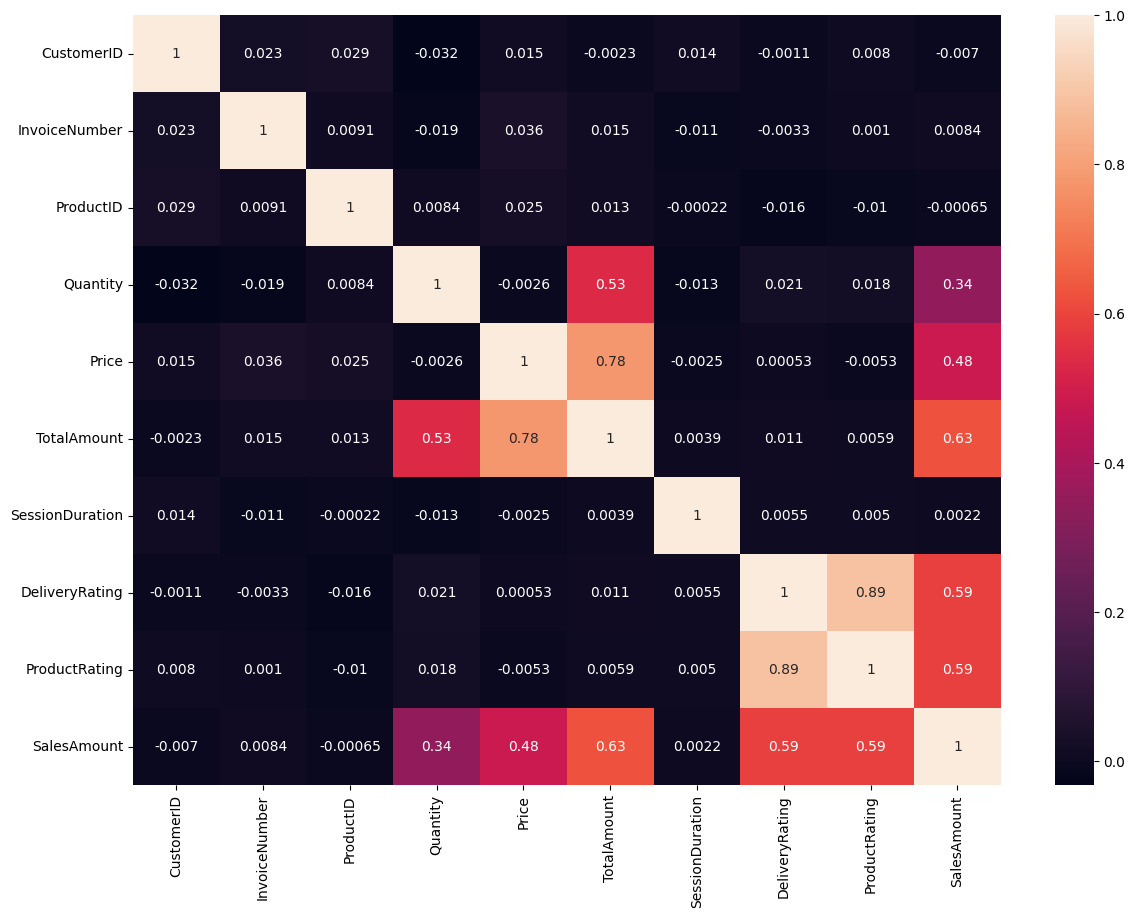

In [36]:
#Heatmap
plt.figure(figsize=(14, 10))  
sns.heatmap(corr1,annot=True)

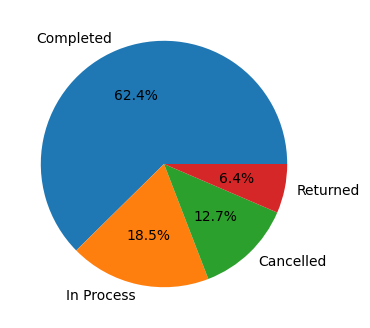

In [37]:
#pie chart for a categorical feature
categorical_feature = 'OrderStatus'
df1[categorical_feature].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4))
plt.ylabel('')
plt.show()

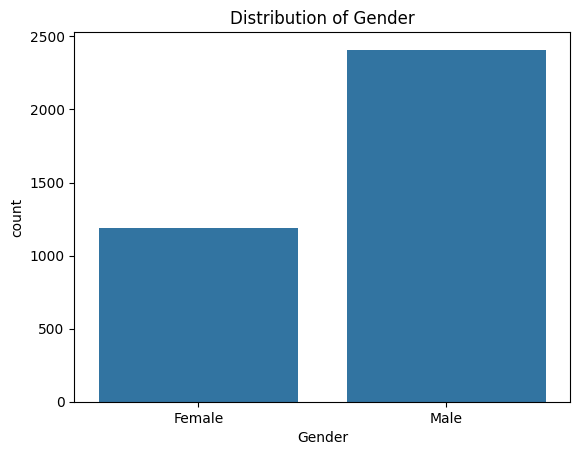

In [38]:
#Plot a bar plot for a categorical feature
sns.countplot( x='Gender',data=df1)
plt.title('Distribution of Gender')
plt.show()

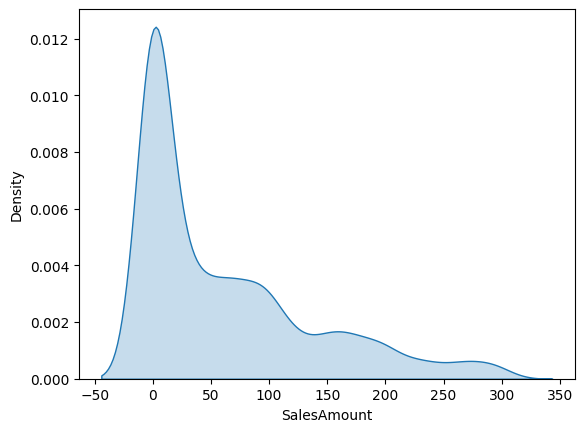

In [39]:
# KDE Plot
numerical_feature = 'SalesAmount'
sns.kdeplot(data=df1, x=numerical_feature, fill=True)
plt.show()

<Axes: xlabel='SalesAmount', ylabel='Count'>

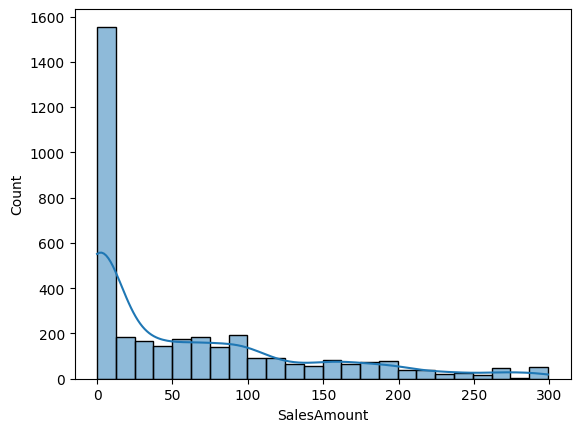

In [40]:
#histplot
sns.histplot(data=df1,x=df1.SalesAmount,kde=True)

### Feature Engineering

#### One Hot Encoding

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
categorical_cols = df1.select_dtypes(include=['object']).columns
numerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns

In [43]:
#object created for the class
one_hot_encoder= OneHotEncoder(sparse_output=False, handle_unknown = 'ignore')
encoded_cols=one_hot_encoder.fit_transform(df1[categorical_cols])

In [44]:
#converting matrix to df
df1_encoded=pd.DataFrame(encoded_cols)

In [45]:
#name columns
df1_encoded = pd.DataFrame(encoded_cols,columns=one_hot_encoder.get_feature_names_out(categorical_cols))

In [46]:
df1_one_hot_encoded=pd.concat([df1[numerical_cols], df1_encoded], axis=1)
df1_one_hot_encoded

,CustomerID,InvoiceNumber,ProductID,Quantity,Price,TotalAmount,SessionDuration,DeliveryRating,ProductRating,SalesAmount,...,DeviceCategory_Mobile,Device_Desktop,Device_Laptop,Device_Smart Phone,Device_Tablet,OS_Android,OS_Linux,OS_Mac,OS_Windows,OS_iOS
0,9691,26088332,32,3,91.37,274.11,6.54,2,5,274.11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,8327,95183269,34,1,48.24,48.24,5.01,0,0,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,6801,44769684,64,2,35.23,70.46,0.10,1,2,70.46,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4406,12422351,41,2,32.33,64.66,1.95,4,4,64.66,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1966,84352310,20,1,81.89,81.89,9.15,5,3,81.89,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,1130,71920492,75,3,32.34,97.02,9.42,0,0,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3595,8329,60510134,2,1,33.11,33.11,9.78,4,5,33.11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3596,8023,52697896,2,1,33.11,33.11,9.80,3,5,33.11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3597,8307,61266739,55,2,73.53,147.06,6.53,0,0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Split the data into training and testing sets

In [47]:
# Separate features and target variable
X = df1_one_hot_encoded.drop(columns=['SalesAmount'])
y = df1_one_hot_encoded['SalesAmount']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature selection

#### SelectKbest -Filter method

In [49]:
from sklearn.feature_selection import SelectKBest, f_regression
k_best = SelectKBest(score_func=f_regression, k=10)
k_best.fit(X_train, y_train)
mask = k_best.get_support()
top_features_kbest = X_train.columns[mask]

In [50]:
top_features_kbest

Index(['Quantity', 'Price', 'TotalAmount', 'DeliveryRating', 'ProductRating',
       'OrderStatus_Cancelled', 'OrderStatus_Completed',
       'OrderStatus_In Process', 'OrderStatus_Returned',
       'TrafficSource_Paid Advertisment'],
      dtype='object')

In [51]:
# Reduce the dataset to selected features
X_train_selected = X_train[top_features_kbest]
X_test_selected = X_test[top_features_kbest]

### Feature Scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
# Initialize the scaler
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [54]:
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

### ML Model Building

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [56]:
# Initialize models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoostRegressor": AdaBoostRegressor(n_estimators=100, random_state=42),
    "MLPRegressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "SVR": SVR(kernel='rbf')
}

#### Train and evaluate models 

In [57]:
# Function to evaluate models
def evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test):
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mae, mse,rmse,r2

In [58]:
# Evaluate each model and store results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
results = {}
for model_name, model in models.items():
    mae, mse,rmse, r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE':rmse, 'R2': r2}


In [59]:
# Display results
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='R2', ascending=False)
results_df

,MAE,MSE,RMSE,R2
MLPRegressor,0.075471,0.010482,0.102382,0.999998
RandomForestRegressor,0.020069,0.052629,0.229409,0.999991
GradientBoostingRegressor,0.433035,0.503190,0.709359,0.999916
AdaBoostRegressor,5.338276,71.802449,8.473633,0.988026
SVR,5.924028,250.904874,15.839977,0.958160
LinearRegression,29.060107,1437.032835,37.908216,0.760366


### Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
models = {
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
      'MLPRegressor': {
        'model':MLPRegressor(),
        'params':{
        'hidden_layer_sizes': [(50, 50), (100, 50), (100,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive']
        }
    },
    
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'positive': [True, False]
        }
    },
    'GradientBoostingRegressor': {
        'model':GradientBoostingRegressor(),
        'params':{
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
     'AdaBoostRegressor': {
        'model':AdaBoostRegressor(),
        'params':{
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'loss': ['linear', 'square', 'exponential']
        }
   },
    'SVR': {
        'model': SVR(),
        'params': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.2, 0.5]
        }
    }
}

In [68]:
# Dictionary to store the best models
best_models = {}

In [ ]:
# Perform grid search for each model
for model_name, config in models.items():
    model = config['model']
    params = config['params']
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")

In [ ]:
# Evaluate the best models
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}, R^2 Score: {r2}")